## Problem Statement: 
# ***Comcast Telecom Consumer Complaints analysis***

## 1.To provide the trend chart for the number of complaints at monthly and daily granularity levels.
## 2.To provide a table with the frequency of complaint types.
## 3.To find which complaint types are maximum i.e., around internet, network issues, or across any other domains.
## 4.To create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed &    Solved is to be categorized as Closed.
## 5.To Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights       on:
## 6.To find which state has the maximum complaints
## 7.To find which state has the highest percentage of unresolved complaints
## 8.To Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [1]:
from pandas import *
import matplotlib.pyplot as plt

In [2]:
file=read_csv(r"C:\Users\User\Desktop\Comcast_telecom_complaints_data.csv")

In [3]:
file.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No


In [4]:
file.shape

(2224, 11)

# 1.To Provide the trend chart for the number of complaints at monthly and daily granularity levels.


In [5]:
file.Date=to_datetime(file.Date)
file=file.set_index('Date')
file.head(2)

,Ticket #,Customer Complaint,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Date,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
2015-04-08,223441,Payment disappear - service got disconnected,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No


In [6]:
file.columns

Index(['Ticket #', 'Customer Complaint', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [7]:
file.columns=['Ticket', 'Customer_Complaint', 'Date_month_year', 'Time',
       'Received_Via', 'City', 'State', 'Zip_code', 'Status',
       'Filing_on_Behalf_of_Someone']

In [8]:
file.columns

Index(['Ticket', 'Customer_Complaint', 'Date_month_year', 'Time',
       'Received_Via', 'City', 'State', 'Zip_code', 'Status',
       'Filing_on_Behalf_of_Someone'],
      dtype='object')

In [9]:
file.Customer_Complaint.resample('M').count()

Date
2015-04-30     545
2015-05-31     399
2015-06-30    1280
Freq: M, Name: Customer_Complaint, dtype: int64

Text(0.5, 1.0, 'Monthly analysis on customer complaints')

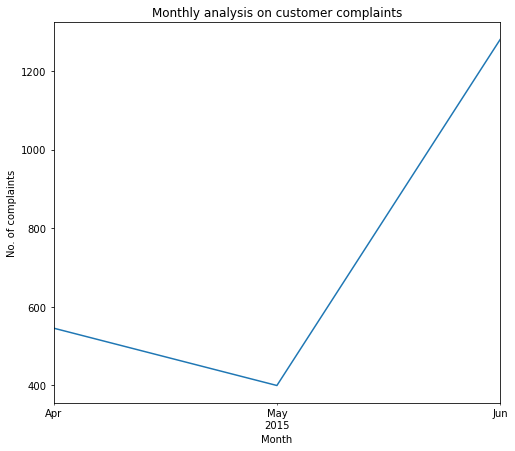

In [10]:
%matplotlib inline
plt.figure(figsize=(8,7))
file.Customer_Complaint.resample('M').count().plot()
plt.xlabel("Month")
plt.ylabel("No. of complaints")
plt.title("Monthly analysis on customer complaints")

Text(0.5, 1.0, 'Weekly analysis on customer complaints')

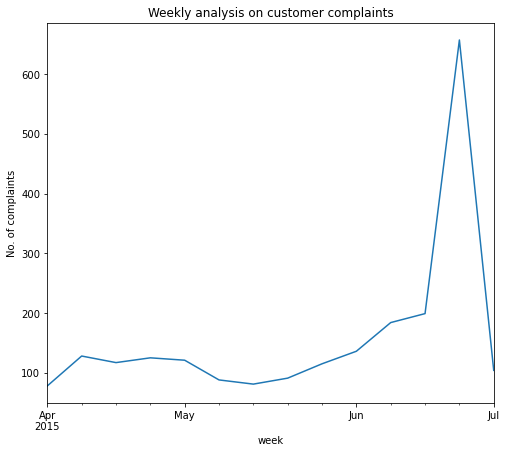

In [11]:
plt.figure(figsize=(8,7))
file.Customer_Complaint.resample('W').count().plot()
plt.xlabel("week")
plt.ylabel("No. of complaints")
plt.ylabel("No. of complaints")
plt.title("Weekly analysis on customer complaints")

Text(0.5, 1.0, 'Daily analysis on customer complaints')

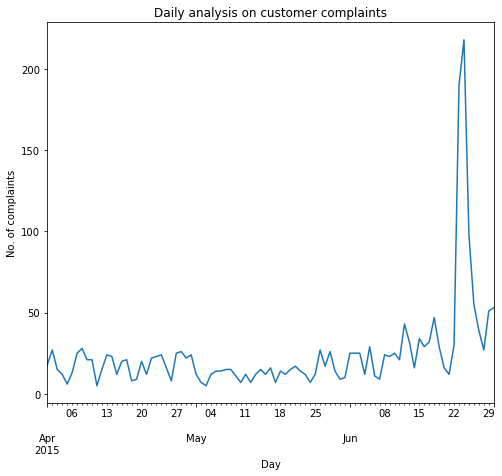

In [12]:
plt.figure(figsize=(8,7))
file.Customer_Complaint.resample('D').count().plot()
plt.xlabel("Day")
plt.ylabel("No. of complaints")
plt.title("Daily analysis on customer complaints")

# 2. To Provide a table with the frequency of complaint types.

In [13]:
complaint_frequency=file.Customer_Complaint.value_counts()
complaint_frequency

Comcast                                                               83
Comcast Internet                                                      18
Comcast Data Cap                                                      17
comcast                                                               13
Comcast Data Caps                                                     11
                                                                      ..
Possible Internet Speed Throttling by my Comcast Internet Provider     1
Poor customer service                                                  1
Robber Barron Billing Practices                                        1
Comcast Xfinity barely ever works and speed sucks                      1
Comcast poor service or throttling                                     1
Name: Customer_Complaint, Length: 1841, dtype: int64

In [14]:
complaint_frequency_df=DataFrame(complaint_frequency)
complaint_frequency_df.head(3)

,Customer_Complaint
Comcast,83
Comcast Internet,18
Comcast Data Cap,17


In [15]:
complaint_frequency_df.index_name='type_of_complaint'
complaint_frequency_df.columns=['frequency']
complaint_frequency_df

,frequency
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Comcast Data Caps,11
...,...
Possible Internet Speed Throttling by my Comcast Internet Provider,1
Poor customer service,1
Robber Barron Billing Practices,1
Comcast Xfinity barely ever works and speed sucks,1


Text(0.5, 0, 'Type of complaint')

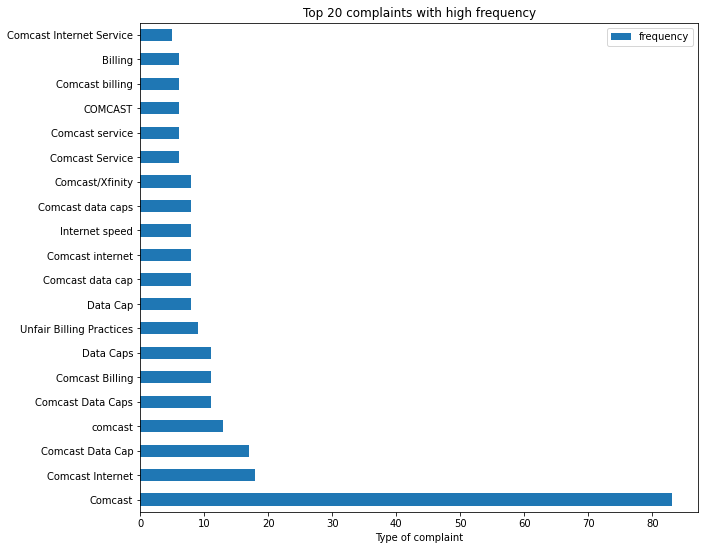

In [16]:
complaint_frequency_df.head(20).plot(kind='barh',figsize=(10,9))
plt.title('Top 20 complaints with high frequency')
plt.xlabel('Type of complaint')

# 3.To find which complaint types are maximum i.e., around internet, network issues, or across any other domains.


In [17]:
Highest=complaint_frequency_df['frequency'].idxmax()

In [18]:
print('complaint types,which are maximum:   ',+complaint_frequency_df.loc[Highest])

complaint types,which are maximum:    frequency    83
Name: Comcast, dtype: int64


# 4.To Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open . Closed & Solved is to be categorized as Closed.

In [19]:
file.Status.value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [20]:
  def function(x):
        if(x=='Pending' or x=='Open'):
            return ('Open')
        if(x=='Solved' or x=='Closed'):
            return('Closed')

In [21]:
file['Status_categorical']=file.Status.apply(function)

In [22]:
file.head(2)

,Ticket,Customer_Complaint,Date_month_year,Time,Received_Via,City,State,Zip_code,Status,Filing_on_Behalf_of_Someone,Status_categorical
Date,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
2015-04-08,223441,Payment disappear - service got disconnected,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed


In [23]:
file['Status_categorical'].value_counts()


Closed    1707
Open       517
Name: Status_categorical, dtype: int64

Text(0.5, 1.0, 'Status of total complaints')

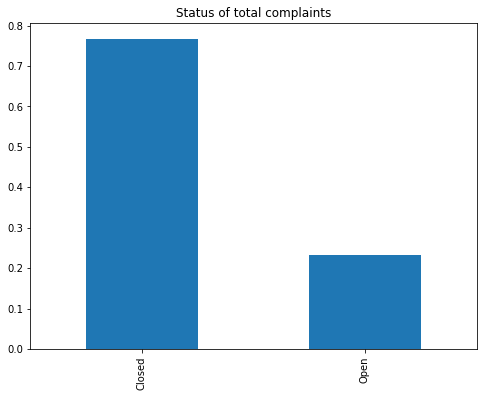

In [24]:
plt.figure(figsize=(8,6))
file['Status_categorical'].value_counts(normalize=True).plot(kind='bar')
plt.title("Status of total complaints")

#  5.To provide state wise status of complaints in a stacked bar chart.

In [25]:
x=file.groupby(["State","Status_categorical"]).size()
x

State          Status_categorical
Alabama        Closed                17
               Open                   9
Arizona        Closed                14
               Open                   6
Arkansas       Closed                 6
                                     ..
Virginia       Open                  11
Washington     Closed                75
               Open                  23
West Virginia  Closed                 8
               Open                   3
Length: 77, dtype: int64

In [26]:
x=file.groupby(["State","Status_categorical"]).size().unstack().fillna(0)

In [27]:
x.head()

Status_categorical,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


Text(0, 0.5, 'States')

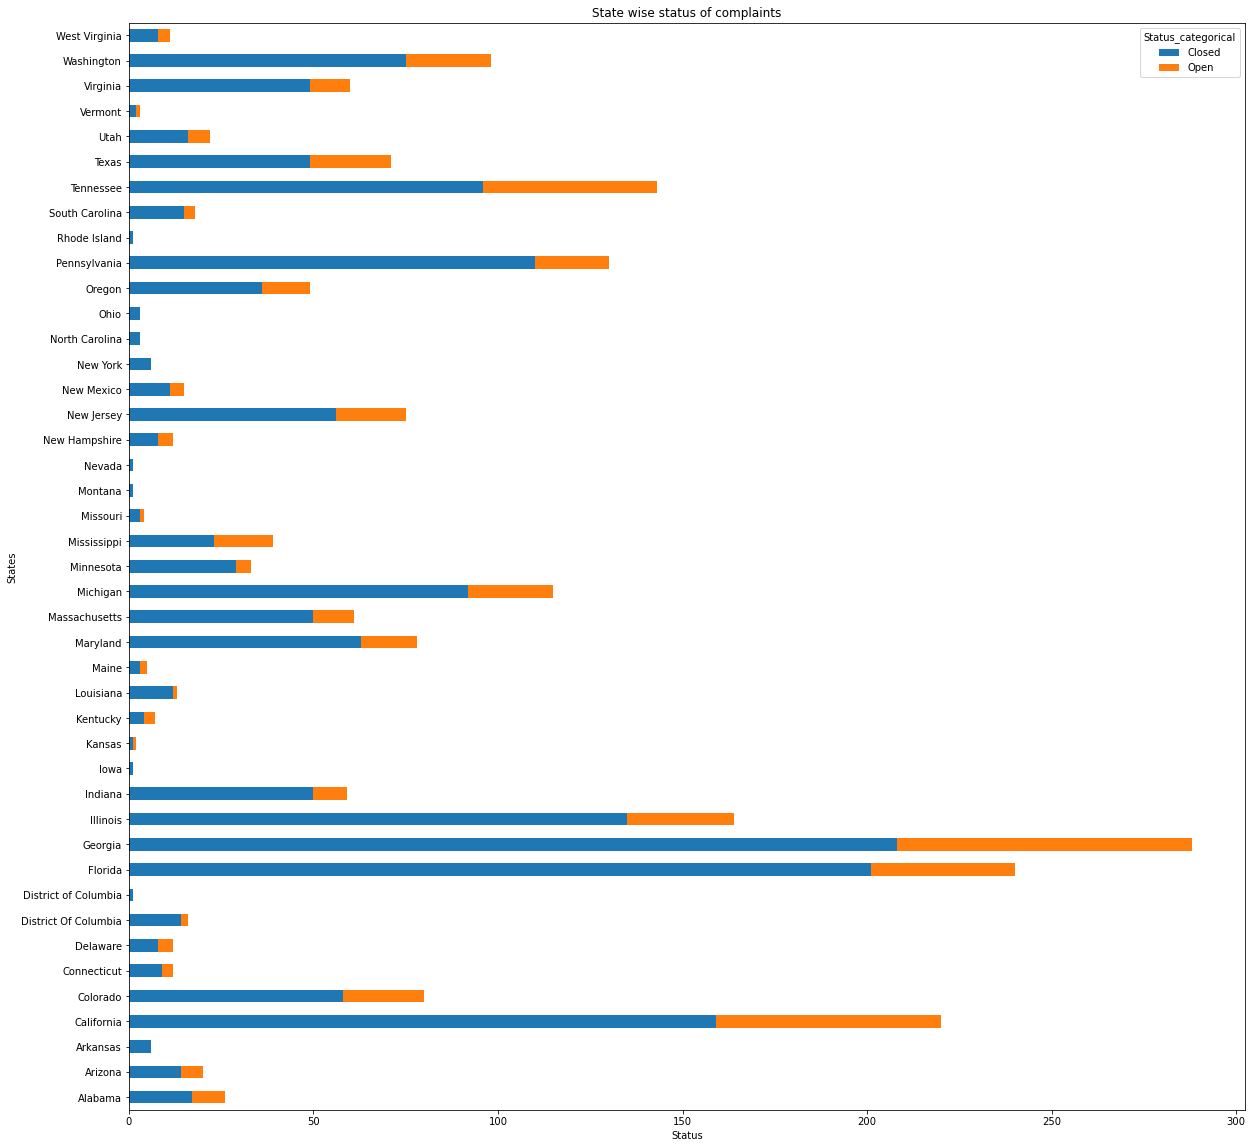

In [28]:
x.plot(kind="barh",stacked=True, figsize=(20,20))
plt.title("State wise status of complaints")
plt.xlabel("Status")
plt.ylabel("States")

# 5.To find which state has the maximum complaints

In [29]:
maximum_complaints_state_index=x.idxmax()

In [30]:
maximum_complaints_state=x.loc[maximum_complaints_state_index]

In [31]:
print(("The state which has maximum number of complaintsis :\n{}").format(maximum_complaints_state))

The state which has maximum number of complaintsis :
Status_categorical  Closed  Open
State                           
Georgia              208.0  80.0
Georgia              208.0  80.0


# 6. Which state has the highest percentage of unresolved complaints

In [32]:
x.columns=['Closed','Open']


In [33]:
y=x.Open.sum()
y

517.0

In [34]:
z=(x.Open/y)*100
z

State
Alabama                  1.740812
Arizona                  1.160542
Arkansas                 0.000000
California              11.798839
Colorado                 4.255319
Connecticut              0.580271
Delaware                 0.773694
District Of Columbia     0.386847
District of Columbia     0.000000
Florida                  7.543520
Georgia                 15.473888
Illinois                 5.609284
Indiana                  1.740812
Iowa                     0.000000
Kansas                   0.193424
Kentucky                 0.580271
Louisiana                0.193424
Maine                    0.386847
Maryland                 2.901354
Massachusetts            2.127660
Michigan                 4.448743
Minnesota                0.773694
Mississippi              3.094778
Missouri                 0.193424
Montana                  0.000000
Nevada                   0.000000
New Hampshire            0.773694
New Jersey               3.675048
New Mexico               0.773694
New York

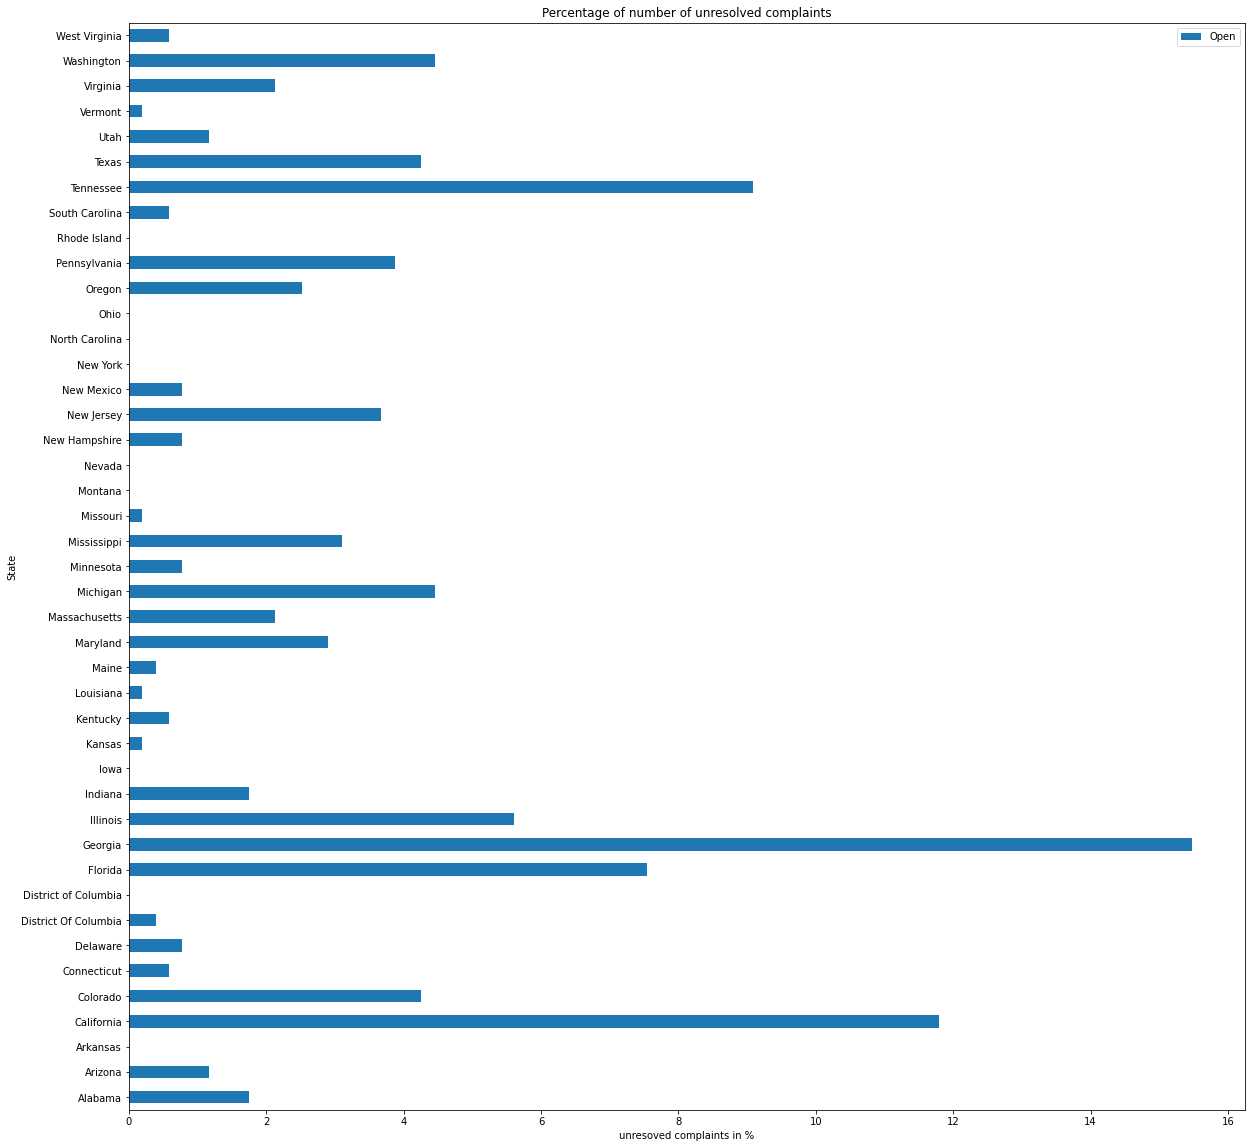

In [35]:
z.plot(kind='barh', figsize=(20,20))
plt.title('Percentage of number of unresolved complaints')
plt.xlabel('unresoved complaints in %')
plt.ylabel('State')
plt.legend()

In [36]:
max_Open=z.round(1).max()

In [37]:
max_Open_index=z.round(1).idxmax()

In [38]:
print("State which has the highest percentage of unresolved complaints is {} with {}%" .format(max_Open_index,max_Open))

State which has the highest percentage of unresolved complaints is Georgia with 15.5%


# 7.To Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [39]:
file.head()

,Ticket,Customer_Complaint,Date_month_year,Time,Received_Via,City,State,Zip_code,Status,Filing_on_Behalf_of_Someone,Status_categorical
Date,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
2015-04-08,223441,Payment disappear - service got disconnected,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2015-04-18,242732,Speed and Service,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
2015-05-07,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
2015-05-26,307175,Comcast not working and no service to boot,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed


In [40]:
file.Received_Via.value_counts()

Customer Care Call    1119
Internet              1105
Name: Received_Via, dtype: int64

In [41]:
list=(file.Status_categorical.value_counts(normalize=True).mul(100).round(1).astype(str)+'%')

In [42]:
list

Closed    76.8%
Open      23.2%
Name: Status_categorical, dtype: object

In [43]:
print("Percentage of complaints resolved till date, which were received through the Internet and customer care calls="
      +list[0])

Percentage of complaints resolved till date, which were received through the Internet and customer care calls=76.8%
